# CMIP6 Diagnostics with Intake-ESGF
In this example, we show how to use intake-esgf to search for CMIP6 data, load our data into xarray datasets, and visualize using matplotlib.

## Imports

In [1]:
import intake_esgf
import matplotlib as mpl
from datatree import DataTree

# Set the matplotlib default font size
mpl.rcParams['font.size'] = 16

## Setup the Catalog

In [2]:
cat = intake_esgf.catalog.ESGFCatalog()
cat

Perform a search() to populate the catalog.

### Search for CMIP6 Experiments

In [3]:
subset = cat.search(
        activity_id="CMIP",
        experiment_id="historical",
        source_id="CESM2",
        variable_id=["gpp", "areacella", "sftlf"],
        member_id=["r1i1p1f1"],
)
subset

  Searching indices: 100%|###################################################################################|1/1 [    1.31s/index]


mip_era                           [CMIP6]
activity_id                        [CMIP]
institution_id                     [NCAR]
source_id                         [CESM2]
experiment_id                [historical]
member_id                      [r1i1p1f1]
table_id                       [fx, Lmon]
variable_id       [areacella, sftlf, gpp]
grid_label                           [gn]
dtype: object

## Load Our Datasets in Xarray
We use xarray here to access the datasets. The `.to_dataset_dict()` method loads the different facets into a dictionary of datasets, cacheing the data to the `~/.esgf` directory on your local filesystem by default.

In [4]:
dsets = subset.to_dataset_dict()

Obtaining file info: 100%|###################################################################################|3/3 [  1.20dataset/s]


### Extract the GPP Dataset
We are interested in the Carbon Mass Flux out of Atmosphere Due to Gross Primary Production on Land (GPP) variable. We need to extract this from the dictionary of datasets using the following:

In [5]:
gpp_ds = dsets['Lmon.gpp']

## Apply a Computation
Let's calculate a monthly average across the historical record. We first define which years we are interested in (ex. 1980 - 2010), then calculate the monthly average.

In [6]:
gpp_monthly_ds = gpp_ds.sel(time=slice("1980", "2010")).groupby("time.month").mean()
gpp_monthly_ds

<xarray.Dataset>
Dimensions:   (month: 12, lat: 192, lon: 288, hist_interval: 2)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: hist_interval
Data variables:
    gpp       (month, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    lat_bnds  (month, lat, hist_interval) float32 -90.0 -89.53 ... 89.53 90.0
    lon_bnds  (month, lon, hist_interval) float32 -0.625 0.625 ... 358.1 359.4
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:40:06Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

### Rename our Months
We are interested in more useful month names. We can fix this by adding in three letter month identifiers.

In [7]:
gpp_monthly_ds["month"] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## Visualize the Output
We can specify plotting by the month, with four months in each row.

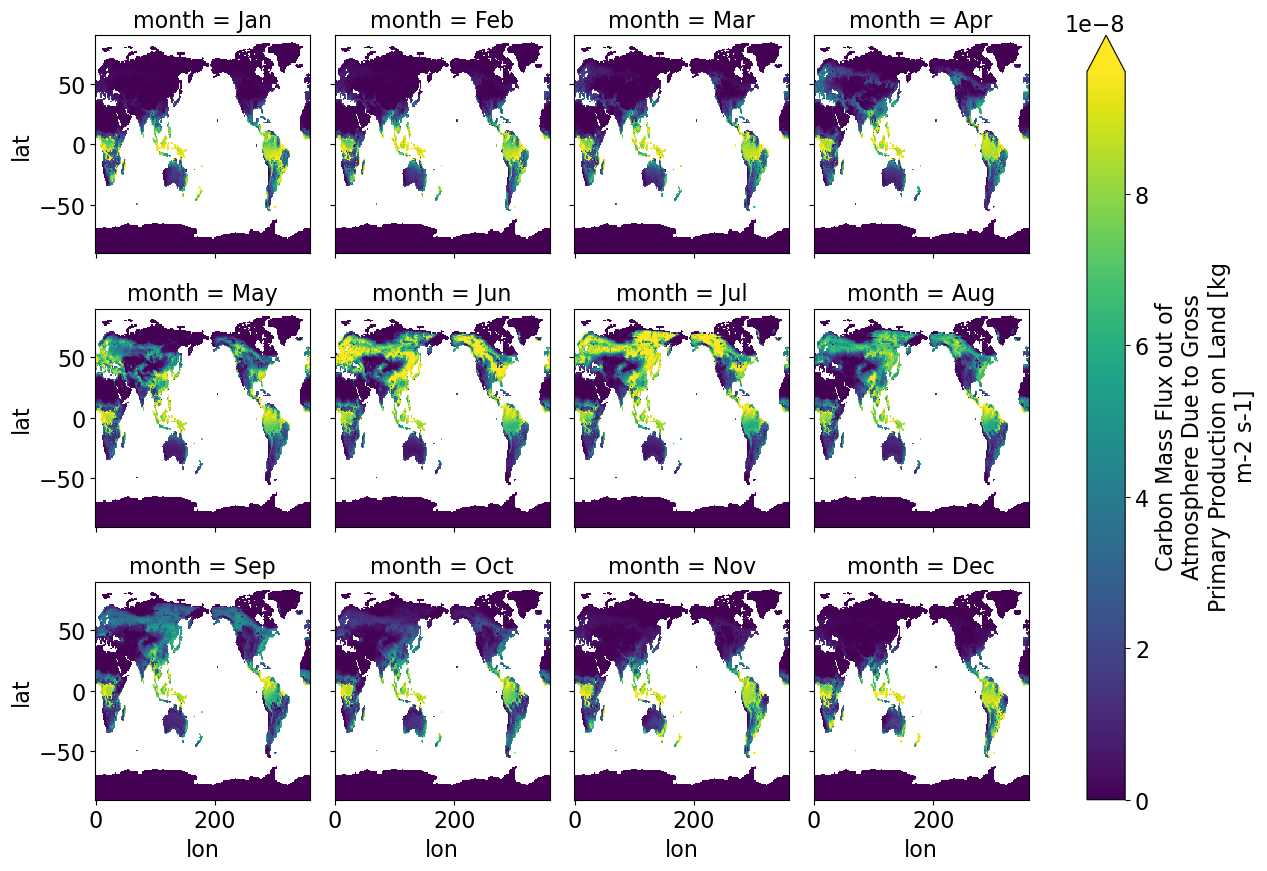

In [8]:
gpp_monthly_ds.gpp.plot(col='month',
                        col_wrap=4,
                        robust=True);